In [1]:
import numpy as np
import matplotlib.pyplot as plt
import folium 
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin
from dbfread import DBF

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Data Sources:
# Lithium concentrations in water:  https://geology-ags-aer.opendata.arcgis.com/datasets/lithium-content-in-groundwater-and-formation-water-dig-2019-0029/explore, obtained 2024-02-06
# Indigenous Communities: https://native-land.ca/, obtained 2024-02-06
# Exploration Projects: https://geology-ags-aer.opendata.arcgis.com/datasets/prospective-areas-for-mineral-exploration-dig-2019-0025/explore, obtained 2024-02-06
# Bedrock Temperatures: https://ags.aer.ca/publication/dig-2021-0031, obtained 2024-02-06
# Bedrock geology: https://www.arcgis.com/home/item.html?id=8ffb78beb46746f4939df49ccc3d65da, obtained 2024-02-06
# Earthquakes: https://ags-aer.shinyapps.io/Seismicity_waveform_app/, obtained 2024-02-06

In [3]:
# import lithium concentrations
lithium_df = gpd.read_file('Lithium_Content_in_Groundwater_and_Formation_Water_(DIG_2019-0029).geojson')

In [4]:
lithium_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1635 non-null   int64   
 1   AGS_LITHID  1635 non-null   object  
 2   Site_ID     1635 non-null   int64   
 3   UWI         1635 non-null   object  
 4   Lat_NAD83   1635 non-null   float64 
 5   Long_NAD83  1635 non-null   float64 
 6   Li_mg_L     1635 non-null   object  
 7   Geo_Unit    1635 non-null   object  
 8   Gr_El_masl  1635 non-null   float64 
 9   KB_El_masl  1635 non-null   float64 
 10  T_Depth_m   1635 non-null   float64 
 11  B_Depth_m   1635 non-null   float64 
 12  M_Depth_m   1635 non-null   float64 
 13  Cat_An_Bal  1635 non-null   float64 
 14  Comments    1635 non-null   object  
 15  Report_No   1635 non-null   object  
 16  Reference   1635 non-null   object  
 17  Pub_by      1635 non-null   object  
 18  Date_Samp   903 non-null    object  
 19

In [5]:
lithium_df["Li_mg_L"] = pd.to_numeric(lithium_df["Li_mg_L"], errors="coerce")
lithium_df["Li_mg_L"].dropna(inplace=True)

In [6]:
lithium_df = lithium_df.to_crs("EPSG:4269")

<Axes: >

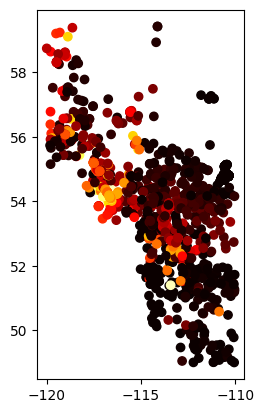

In [7]:
lithium_df.plot(column= "Li_mg_L", cmap="hot")

In [8]:
lithium_df["mid_sample_masl"] = lithium_df["Gr_El_masl"] - lithium_df["M_Depth_m"]

In [9]:
lithium_df

,OBJECTID,AGS_LITHID,Site_ID,UWI,Lat_NAD83,Long_NAD83,Li_mg_L,Geo_Unit,Gr_El_masl,KB_El_masl,...,M_Depth_m,Cat_An_Bal,Comments,Report_No,Reference,Pub_by,Date_Samp,Li_mg_L_No,geometry,mid_sample_masl
0,1,LITHID_0001,486,,51.851378,-114.046245,0.1,Paskapoo Formation,998.5,0.0,...,35.7,0.06252,,AGS DIG 2010-0001,"Eccles, D.R. and Jean, G.M. (2010): Lithium Gr...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",18-Sep-1980,0.1,POINT (-114.04626 51.85138),962.8
1,2,LITHID_0002,98469,100/01-05-064-18W5/0,54.504754,-116.677433,42.0,Beaverhill Lake Group,781.2,786.1,...,2973.5,-0.03650,,AGS DIG 2010-0001,"Eccles, D.R. and Jean, G.M. (2010): Lithium Gr...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",None,42.0,POINT (-116.67745 54.50476),-2192.3
2,3,LITHID_0003,555,,51.709009,-112.205081,0.2,,815.5,0.0,...,50.3,0.01821,,AGS DIG 2010-0001,"Eccles, D.R. and Jean, G.M. (2010): Lithium Gr...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",08-Aug-1977,0.2,POINT (-112.20509 51.70902),765.2
3,4,LITHID_0004,772,,49.104645,-111.190510,NaN,,0.0,0.0,...,0.0,0.00308,,AGS DIG 2010-0001,"Eccles, D.R. and Jean, G.M. (2010): Lithium Gr...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",08-Sep-1977,0.1,POINT (-111.19052 49.10465),0.0
4,5,LITHID_0005,105401,100/01-07-069-21W5/0,54.953639,-117.183213,30.0,Jurassic system,646.5,650.7,...,1468.9,0.00058,,AGS DIG 2010-0001,"Eccles, D.R. and Jean, G.M. (2010): Lithium Gr...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",None,30.0,POINT (-117.18323 54.95365),-822.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,1631,LITHID_1684,0,15-05-069-21W5,54.951292,-117.161367,17.1,Montney Formation,0.0,0.0,...,0.0,0.00000,,"Eccles et al., 2012 (Technical Report Valleyvi...","Eccles, R., Dufresne, M., McMIllan, K., Touw, ...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",2010-2011,17.1,POINT (-117.16138 54.95130),0.0
1631,1632,LITHID_1685,0,15-31-068-21W5,54.935411,-117.188719,66.5,Woodbend Group,0.0,0.0,...,0.0,0.00000,,"Eccles et al., 2012 (Technical Report Valleyvi...","Eccles, R., Dufresne, M., McMIllan, K., Touw, ...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",2010-2011,66.5,POINT (-117.18874 54.93542),0.0
1632,1633,LITHID_1686,0,16-17-069-22W5,54.981069,-117.306466,41.3,Wapiabi Formation,0.0,0.0,...,0.0,0.00000,,"Eccles et al., 2012 (Technical Report Valleyvi...","Eccles, R., Dufresne, M., McMIllan, K., Touw, ...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",2010-2011,41.3,POINT (-117.30648 54.98108),0.0
1633,1634,LITHID_1687,0,16-29-071-23W5,55.184265,-117.494513,70.5,Woodbend Group,0.0,0.0,...,0.0,0.00000,,"Eccles et al., 2012 (Technical Report Valleyvi...","Eccles, R., Dufresne, M., McMIllan, K., Touw, ...","<a href=""https://ags.aer.ca/"" target=""_blank"">...",2010-2011,70.5,POINT (-117.49453 55.18427),0.0


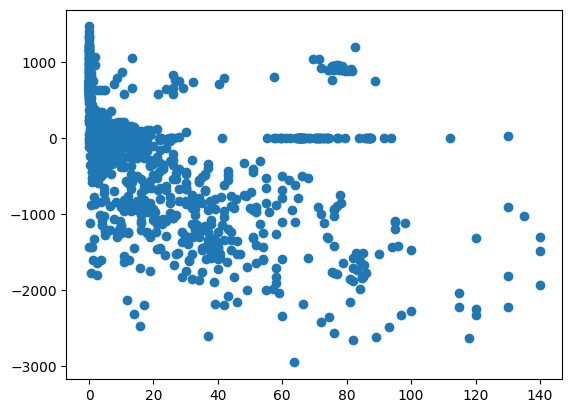

In [10]:
plt.scatter(lithium_df["Li_mg_L"], lithium_df["mid_sample_masl"])

In [11]:
# import indigenous communities
indigenous_df = gpd.read_file('nativelands_territories.json')

In [12]:
indigenous_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           2059 non-null   object  
 1   Name         2059 non-null   object  
 2   ID           2059 non-null   int64   
 3   Slug         2059 non-null   object  
 4   description  2059 non-null   object  
 5   color        2059 non-null   object  
 6   geometry     2059 non-null   geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 112.7+ KB


In [13]:
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
canada = world[world.NAME == "Canada"]

In [14]:
canada.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
indigenous_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

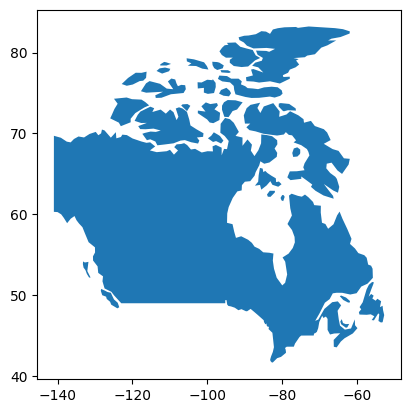

In [16]:
canada.plot()

In [17]:
canada = canada.to_crs("EPSG:4269")

<Axes: >

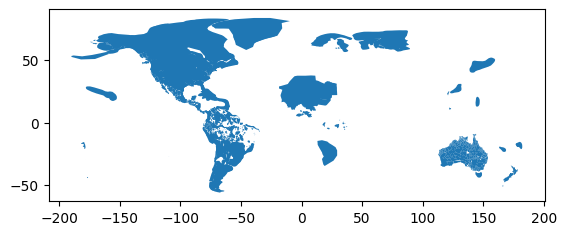

In [18]:
indigenous_df.plot()

In [19]:
indigenous_df = indigenous_df.to_crs("EPSG:4269")

In [20]:
indigenous_df_filtered = sjoin(indigenous_df, canada, how='inner')

<Axes: >

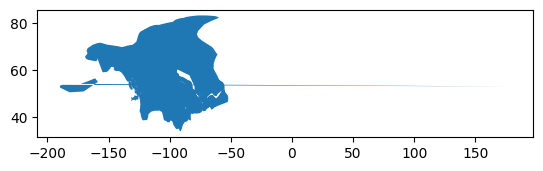

In [21]:
indigenous_df_filtered.plot()

In [22]:
indigenous_df_filtered = indigenous_df_filtered.to_crs("EPSG:4269")

In [23]:
# import exploration projects
exploration_proj_df = gpd.read_file('Exploration_Projects_with_Resource_Estimate.geojson')
exploration_proj_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     14 non-null     int64   
 1   Name         14 non-null     object  
 2   Company      14 non-null     object  
 3   Long_NAD83   14 non-null     float64 
 4   Lat_NAD83    14 non-null     float64 
 5   Location     14 non-null     object  
 6   Comm_1       14 non-null     object  
 7   Other_Comm   14 non-null     object  
 8   Dep_Type     14 non-null     object  
 9   Host_Rock    14 non-null     object  
 10  Geo_Age      14 non-null     object  
 11  Geo_Unit     14 non-null     object  
 12  NI_43_101    14 non-null     object  
 13  R_Category   14 non-null     object  
 14  Ref_Rep      14 non-null     object  
 15  Ref_PEA_Rep  14 non-null     object  
 16  R_Summary    14 non-null     object  
 17  geometry     14 non-null     geometry
dtypes: float64(2), geometry(

Clearly not a lot of data in this file. Choose to ignore. 

Importing bedrock temperatures

In [24]:
# looking at DIG-2021-0029 Data for across Alberta!
# Imports temperature readings across Alberta
ab_temps_df = pd.read_csv('DIG_2021_0029/DIG_2021_0029.txt', sep="\t")

In [25]:
ab_temps_df

,UWI,Lat_NAD83,Long_NAD83,Source,Type,Depth_m,El_masl28,Temp_rec_C,Temp_est_C,Residual_C,Publisher
0,100010100505W400,49.351607,-110.545992,Log,LAS,1131.00,-140.10,35.0,38.5,-1.2,Alberta Geological Survey
1,100010100717W400,49.527096,-112.177438,Log,LAS,1011.00,-58.60,32.0,34.0,-1.5,Alberta Geological Survey
2,100010100816W400,49.613088,-112.039618,Log,MF,1003.71,-102.41,32.8,34.7,-0.3,Alberta Geological Survey
3,100010100823W400,49.611610,-112.987400,Nieuw,D,1282.50,-326.80,33.4,33.4,2.9,Alberta Geological Survey
4,100010100823W400,49.611610,-112.987400,Nieuw,D,1252.50,-296.80,33.6,33.6,2.3,Alberta Geological Survey
...,...,...,...,...,...,...,...,...,...,...,...
230697,1W0133211907W600,59.385980,-119.178980,Nieuw,A,1721.00,-1125.40,73.0,73.0,-0.7,Alberta Geological Survey
230698,1W0133211907W600,59.385976,-119.178983,Log,MF,1991.26,-1395.66,73.1,85.3,-2.3,Alberta Geological Survey
230699,1W0133301816W402,50.570670,-112.158040,Nieuw,A,1118.00,-345.70,37.0,37.0,0.5,Alberta Geological Survey
230700,1W0133505324W500,53.626498,-117.440531,Log,LAS,2773.20,-1488.70,75.0,91.8,0.1,Alberta Geological Survey


In [26]:
# convert to a geodataframe using the lat long coordinates
ab_temps_gdf = gpd.GeoDataFrame(ab_temps_df, geometry=gpd.points_from_xy(ab_temps_df["Long_NAD83"], ab_temps_df["Lat_NAD83"]), crs="EPSG:4269")

In [27]:
ab_temps_gdf

,UWI,Lat_NAD83,Long_NAD83,Source,Type,Depth_m,El_masl28,Temp_rec_C,Temp_est_C,Residual_C,Publisher,geometry
0,100010100505W400,49.351607,-110.545992,Log,LAS,1131.00,-140.10,35.0,38.5,-1.2,Alberta Geological Survey,POINT (-110.54599 49.35161)
1,100010100717W400,49.527096,-112.177438,Log,LAS,1011.00,-58.60,32.0,34.0,-1.5,Alberta Geological Survey,POINT (-112.17744 49.52710)
2,100010100816W400,49.613088,-112.039618,Log,MF,1003.71,-102.41,32.8,34.7,-0.3,Alberta Geological Survey,POINT (-112.03962 49.61309)
3,100010100823W400,49.611610,-112.987400,Nieuw,D,1282.50,-326.80,33.4,33.4,2.9,Alberta Geological Survey,POINT (-112.98740 49.61161)
4,100010100823W400,49.611610,-112.987400,Nieuw,D,1252.50,-296.80,33.6,33.6,2.3,Alberta Geological Survey,POINT (-112.98740 49.61161)
...,...,...,...,...,...,...,...,...,...,...,...,...
230697,1W0133211907W600,59.385980,-119.178980,Nieuw,A,1721.00,-1125.40,73.0,73.0,-0.7,Alberta Geological Survey,POINT (-119.17898 59.38598)
230698,1W0133211907W600,59.385976,-119.178983,Log,MF,1991.26,-1395.66,73.1,85.3,-2.3,Alberta Geological Survey,POINT (-119.17898 59.38598)
230699,1W0133301816W402,50.570670,-112.158040,Nieuw,A,1118.00,-345.70,37.0,37.0,0.5,Alberta Geological Survey,POINT (-112.15804 50.57067)
230700,1W0133505324W500,53.626498,-117.440531,Log,LAS,2773.20,-1488.70,75.0,91.8,0.1,Alberta Geological Survey,POINT (-117.44053 53.62650)


<Axes: >

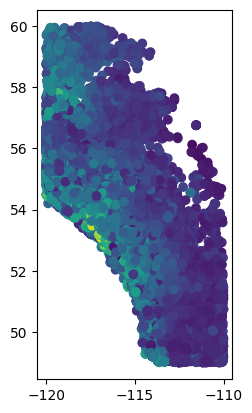

In [28]:
ab_temps_gdf.plot(column="Temp_rec_C")

In [29]:
ab_temps_gdf = ab_temps_gdf.to_crs("EPSG:4269")

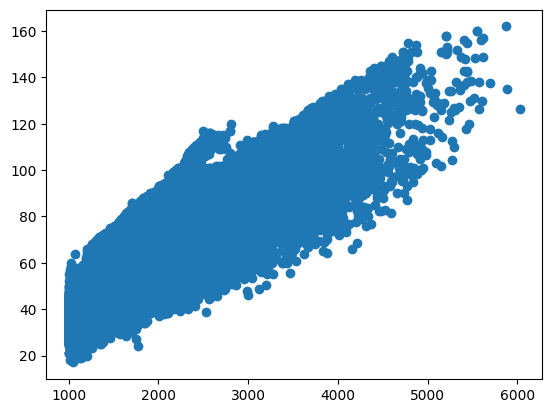

In [30]:
# clearly from the above graphic, we have some areas of high temperature and other areas of relatively lower temperature. 
# how does the temperature tend to change with depth?
plt.scatter(ab_temps_gdf["Depth_m"], ab_temps_gdf["Temp_rec_C"])
plt.show()

In [31]:
# filter out all the readings less than 100 degrees C
ab_temps_gdf_100c = ab_temps_gdf[ab_temps_gdf["Temp_rec_C"] >= 100]

In [32]:
ab_temps_gdf_100c

,UWI,Lat_NAD83,Long_NAD83,Source,Type,Depth_m,El_masl28,Temp_rec_C,Temp_est_C,Residual_C,Publisher,geometry
152,100010105619W502,53.806280,-116.682150,Nieuw,A,3440.00,-2329.70,110.0,110.0,1.2,Alberta Geological Survey,POINT (-116.68215 53.80628)
153,100010105619W502,53.806280,-116.682150,Nieuw,A,3263.00,-2152.70,108.0,108.0,1.1,Alberta Geological Survey,POINT (-116.68215 53.80628)
154,100010105619W502,53.806280,-116.682150,Nieuw,A,3460.00,-2349.70,114.0,114.0,-0.1,Alberta Geological Survey,POINT (-116.68215 53.80628)
155,100010105619W502,53.806280,-116.682150,Nieuw,A,3475.00,-2364.70,115.0,115.0,-0.2,Alberta Geological Survey,POINT (-116.68215 53.80628)
156,100010105619W502,53.806280,-116.682150,Nieuw,A,3420.00,-2309.70,115.0,115.0,-0.6,Alberta Geological Survey,POINT (-116.68215 53.80628)
...,...,...,...,...,...,...,...,...,...,...,...,...
227848,103063409412W600,57.196460,-119.839850,Nieuw,A,2490.70,-1711.80,110.0,110.0,0.1,Alberta Geological Survey,POINT (-119.83985 57.19646)
228032,103080805520W500,53.735930,-116.928690,Nieuw,A,2975.00,-1785.60,106.0,106.0,-0.2,Alberta Geological Survey,POINT (-116.92869 53.73593)
228517,103113307507W600,55.543774,-119.026191,Log,LAS,3472.12,-2636.42,101.0,119.2,-0.1,Alberta Geological Survey,POINT (-119.02619 55.54377)
230579,1S0021802707W500,51.300350,-114.969760,Nieuw,A,4173.57,-2615.77,101.0,101.0,2.0,Alberta Geological Survey,POINT (-114.96976 51.30035)


In [33]:
# code adapted from https://dbfread.readthedocs.io/en/latest/exporting_data.html#pandas-data-frames
"""
Load content of a DBF file into a Pandas data frame.

The iter() is required because Pandas doesn't detect that the DBF
object is iterable.
"""


dbf = DBF('earthquake-data.shp/earthquake-data.dbf')
ab_earthquakes_df = pd.DataFrame(iter(dbf))
ab_earthquakes_gdf = gpd.GeoDataFrame(ab_earthquakes_df, geometry=gpd.points_from_xy(ab_earthquakes_df["LON"], ab_earthquakes_df["LAT"]), crs="EPSG:4269")


In [34]:
ab_earthquakes_gdf

,DT_UTC,DT_MT,LAT,LON,DEPTH,DTYPE,MAG,MTYPE,ETYPE,REF_ID,LOCATION,ALGORITHM,geometry
0,2006-09-24,2006-09-24,49.1089,-111.0550,5,g,1.65,ml,SE,NaN,"""17 km NE of Aden, AB""",GENLOC,POINT (-111.05500 49.10890)
1,2006-10-21,2006-10-21,52.7359,-116.1337,7,f,1.08,ml,KI,NaN,"""28 km NW of Harlech, AB""",HYPODD,POINT (-116.13370 52.73590)
2,2006-11-05,2006-11-05,51.1998,-116.1756,1,g,1.15,ml,SE,NaN,"""9 km NE of Rockwall Peak, AB""",GENLOC,POINT (-116.17560 51.19980)
3,2006-11-08,2006-11-08,52.7289,-116.1536,8,f,2.74,ml,KI,NaN,"""28 km NW of Harlech, AB""",HYPODD,POINT (-116.15360 52.72890)
4,2006-11-21,2006-11-21,51.5194,-115.7114,1,g,1.14,ml,SE,NaN,"""25 km WNW of Panther Mountain, AB""",GENLOC,POINT (-115.71140 51.51940)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,2024-01-30,2024-01-30,54.2865,-117.6011,5,f,1.57,mly,KI,NaN,"""53 km WSW of Fox Creek, AB""",GENLOC,POINT (-117.60110 54.28650)
5944,2024-01-30,2024-01-30,54.1832,-117.7162,6,f,1.58,mly,KI,NaN,"""64 km WSW of Fox Creek, AB""",GENLOC,POINT (-117.71620 54.18320)
5945,2024-01-30,2024-01-30,54.2833,-117.6247,3,f,3.04,ml,KI,424463.0,"""54 km WSW of Fox Creek, AB""",GENLOC,POINT (-117.62470 54.28330)
5946,2024-01-30,2024-01-30,54.2489,-117.6001,4,f,1.61,mly,KI,NaN,"""54 km WSW of Fox Creek, AB""",GENLOC,POINT (-117.60010 54.24890)


<Axes: >

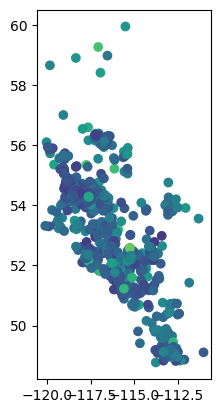

In [35]:
ab_earthquakes_gdf.plot(column="MAG")

In [36]:
# import bedrock information (purely informational & for graphics if desired)
bedrock_df = gpd.read_file("Bedrock_Geology_of_Alberta_(DIG_2013-0018).geojson")
bedrock_df

,FID,RGB,ColorGroup,Unit_Name,Lithology,Environ,Age,GeolRegion,GlobalID,SHAPE_Length,SHAPE_Area,geometry
0,1,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{5D4E7981-96AD-46D3-B20D-03834F8F26B0},0.195295,0.001023,"MULTIPOLYGON (((-116.27235 51.96273, -116.2716..."
1,2,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{4C9C83AA-2487-48D6-97E1-B958F2E9F215},0.782399,0.000798,"MULTIPOLYGON (((-116.12520 51.89036, -116.1261..."
2,3,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{586BEB27-A59D-4B4D-92E1-9F32990ED0FA},0.786313,0.006660,"MULTIPOLYGON (((-116.69867 52.00802, -116.6967..."
3,4,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{C5E3C465-C6E5-45CE-960C-56FA8C5F0A25},0.113385,0.000182,"MULTIPOLYGON (((-117.57597 52.12897, -117.5777..."
4,5,0-168-168,O,Ordovician strata,"Dolostone, sandstone, limestone, and shale",Shallow marine,Ordovician,Mountains and Foothills,{5A296764-4150-4DCD-966E-15719D7CE67C},0.153343,0.000904,"MULTIPOLYGON (((-117.05134 52.14112, -117.0551..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1171,235-125-100,PG_NG,Hand Hills Formation,Gravel and sand,Fluvial,Neogene,Plains,{A274AF7B-F14F-4955-BFE4-D2F5198837B6},0.076744,0.000166,"MULTIPOLYGON (((-112.34328 51.56652, -112.3396..."
1171,1172,235-125-100,PG_NG,Hand Hills Formation,Gravel and sand,Fluvial,Neogene,Plains,{AC923127-7D63-4B1A-8CBC-34E4CCAA328A},0.017274,0.000020,"MULTIPOLYGON (((-112.32287 51.56399, -112.3266..."
1172,1173,235-125-100,PG_NG,Hand Hills Formation,Gravel and sand,Fluvial,Neogene,Plains,{D645BF49-093C-4394-9678-23022F93DB2A},0.026378,0.000048,"MULTIPOLYGON (((-112.33345 51.57521, -112.3311..."
1173,1174,255-167-127,PG,Upland Gravel (Halverson Ridge),Gravel and sand,Fluvial,Paleogene,Plains,{05C8CA1F-06E6-4DBE-913D-CE42525DA49A},2.764545,0.043796,"MULTIPOLYGON (((-118.87641 57.34017, -118.8728..."


<Axes: >

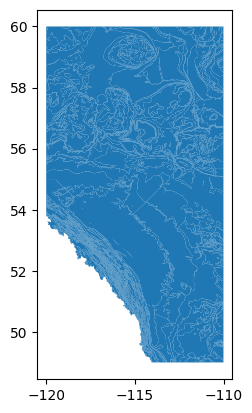

In [37]:
bedrock_df.plot()

In [38]:
# looks like that is importing as expected! 

In [39]:
bedrock_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
# wrong crs, move all data to a standard CRS
bedrock_df = bedrock_df.to_crs("EPSG:4269")

In [41]:
# import ATS reference grid for gridding things out!
# Import V4-1_TWP.shp, as the other files are too big and brick computer :(

ATS_gdf = gpd.read_file("ATS_Polygons_SHP_Geographic/V4-1_TWP.shp")

In [42]:
ATS_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8..."
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9..."
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1..."
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4..."
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4..."
...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6..."
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0..."
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3..."
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6..."


<Axes: >

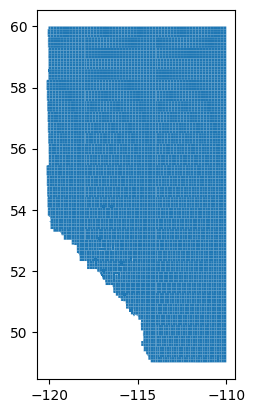

In [43]:
ATS_gdf.plot()

In [44]:
ATS_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [45]:
# import saline storage resources in here
# Saline resources used as carbon sequestration locations as according to ATLAS V, the vast majority of alberta's storage potential is in its saline resources. 

storage_gdf = gpd.read_file("natcarb_saline_poly_shapefile/Natcarb_Saline_poly_shapefile/NATCARB_Saline_Poly_v1502.shp")

In [46]:
storage_gdf = storage_gdf.to_crs("EPSG:4269")

In [47]:
# filter to only units found in Canada 
storage_gdf_filtered = sjoin(storage_gdf, canada, how='inner')

In [48]:
storage_gdf_filtered

,PARTNERSHI,ARRA_PROJE,RESOURCE_N,BASIN_NAME,ASSESSED,CYCLE_OF_L,OVERLAP,DUPLICATE,Shape_Leng,Shape_Area,...,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA
8,WESTCARB,None,Ampitheatre Basin,None,0,"Atlas IV, v1",0,0,7.828058e+04,1.461371e+08,...,None,None,None,None,None,None,None,None,None,None
14,WESTCARB,None,Beaverdell Basin,None,0,"Atlas IV, v1",0,0,4.514859e+04,9.153976e+07,...,None,None,None,None,None,None,None,None,None,None
15,WESTCARB,None,Bellingham Subbasin,None,0,"Atlas IV, v1",0,0,2.978558e+05,1.291079e+09,...,None,None,None,None,None,None,None,None,None,None
19,WESTCARB,None,Blue Mountain Subbasin,None,0,"Atlas IV, v1",0,0,3.116686e+04,6.521778e+07,...,None,None,None,None,None,None,None,None,None,None
21,WESTCARB,None,Bowser Basin,None,0,"Atlas IV, v1",0,0,2.292357e+06,5.708476e+10,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,BSCSP,None,Morrison,Central Montana Uplift,1,"Atlas V, v1",0,0,2.610471e+06,7.592101e+10,...,None,None,None,None,None,None,None,None,None,None
459,BSCSP,None,Sawtooth,Central Montana Uplift,1,"Atlas V, v1",0,0,1.229970e+06,3.066651e+10,...,None,None,None,None,None,None,None,None,None,None
469,BSCSP,None,Swift,Central Montana Uplift,1,"Atlas V, v1",0,0,2.338124e+06,7.698779e+10,...,None,None,None,None,None,None,None,None,None,None
501,BSCSP,None,MissionCanyon,Central Montana Uplift,1,"Atlas V, v1",1,0,3.672090e+05,7.786276e+09,...,None,None,None,None,None,None,None,None,None,None


NOW: GRAPHING

In [49]:
fontprops = fm.FontProperties(size=18)

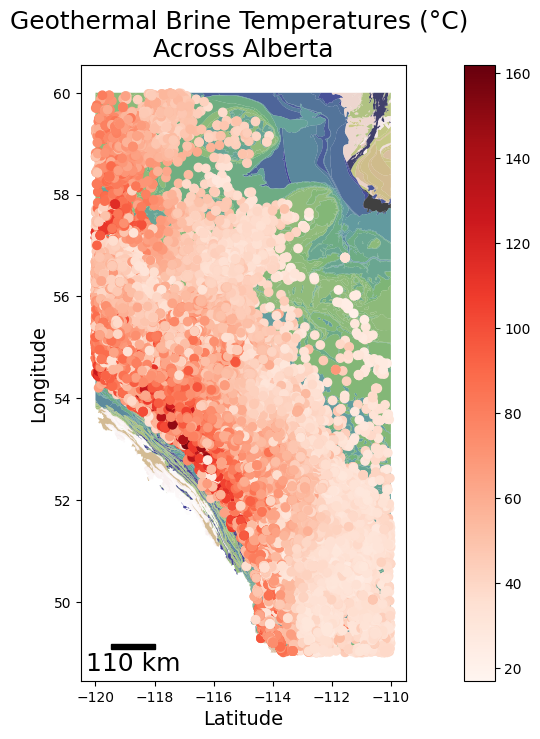

In [50]:
# module for producing graphing. Comment out different lines based on what you would or wouldn't like to see!

ax = bedrock_df.plot(figsize=(15, 8), cmap="gist_earth", alpha=0.75, column="ColorGroup")
# exploration_lithium_df.plot(ax=ax, color='grey', edgecolor='k', label='Exploration_Lithium', legend=True)
# lithium_df.plot(column= "Li_mg_L", cmap="Reds", ax=ax, legend=True, markersize=4)
# fig.get_legend.set_title("Concentration in mg/L")
ab_temps_gdf.plot(ax=ax, cmap="Reds", column = "Temp_rec_C", legend=True)
# ATS_gdf.plot(ax=ax)
# storage_gdf_filtered.plot(ax=ax, cmap="bone", legend=True)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.grid(False)
plt.title("Geothermal Brine Temperatures (°C) \nAcross Alberta", fontsize=18)

scalebar = AnchoredSizeBar(ax.transData,
                           1.5, '110 km', 'lower left', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=0.1,
                           fontproperties=fontprops)
ax.add_artist(scalebar)

plt.savefig(dpi=300, fname="Geothermal Temperatures Across Alberta.png")
plt.show()


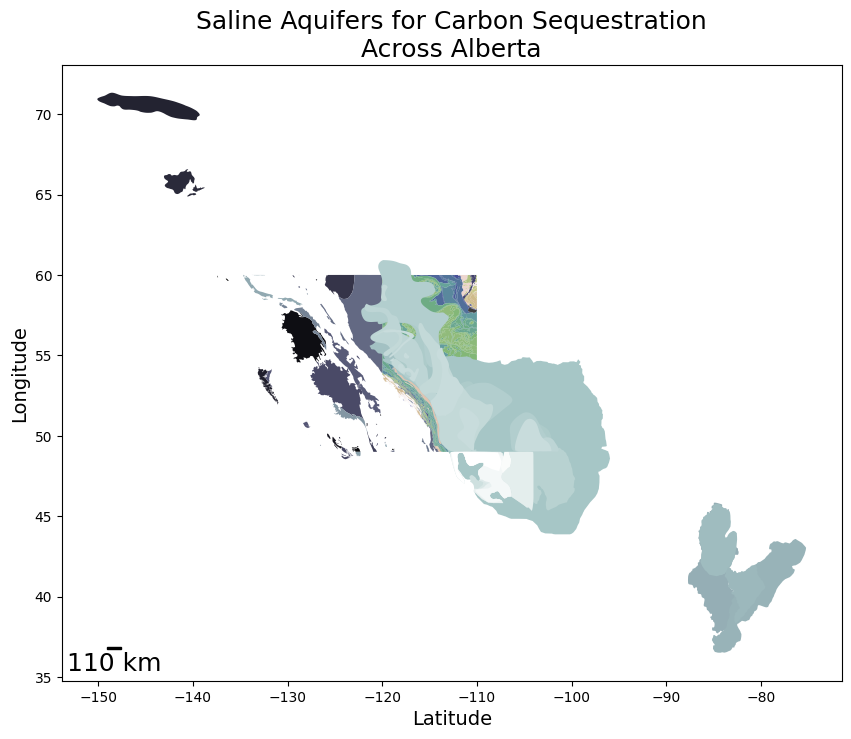

In [51]:
ax = bedrock_df.plot(figsize=(15, 8), cmap="gist_earth", alpha=0.75, column="ColorGroup")
# exploration_lithium_df.plot(ax=ax, color='grey', edgecolor='k', label='Exploration_Lithium', legend=True)
# lithium_df.plot(column= "Li_mg_L", cmap="Reds", ax=ax, legend=True)
# fig.get_legend.set_title("Concentration in mg/L")
# ab_temps_gdf_100c.plot(ax=ax, cmap="Reds", column = "Temp_rec_C", legend=True)
# ATS_gdf.plot(ax=ax)
storage_gdf_filtered.plot(ax=ax, cmap="bone", legend=True)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.grid(False)
plt.title("Saline Aquifers for Carbon Sequestration\nAcross Alberta", fontsize=18)
scalebar = AnchoredSizeBar(ax.transData,
                           1.5, '110 km', 'lower left', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=0.1,
                           fontproperties=fontprops)
ax.add_artist(scalebar)

# plt.savefig(dpi=300, fname="Carbon storage across alberta.png")
plt.show()


MAKE OUR MULTI-CRITERIA SYSTEM

In [52]:
# base it off our ATS grid
MCM_gdf = ATS_gdf.copy()

<Axes: >

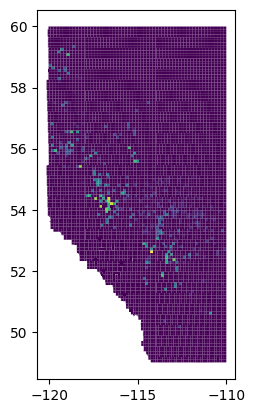

In [53]:
# Put avg lithium readings into the MCM 
temp_sjoin_gdf = gpd.sjoin(ATS_gdf, lithium_df)
temp_dict = temp_sjoin_gdf[["FILE_NAME", "Li_mg_L"]]
temp_lithium = temp_dict.groupby("FILE_NAME").mean().reset_index()

MCM_gdf = MCM_gdf.merge(temp_lithium, how="left", on="FILE_NAME")
MCM_gdf["Li_mg_L"] = MCM_gdf["Li_mg_L"].fillna(0)
MCM_gdf.plot(column="Li_mg_L")

<Axes: >

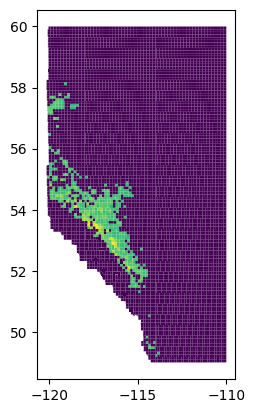

In [54]:
# Put temperatures into the MCM
# temp_temp_sjoin_gdf = gpd.sjoin(ATS_gdf, ab_temps_gdf)
temp_temp_sjoin_gdf = gpd.sjoin(ATS_gdf, ab_temps_gdf_100c)
temp_dict = temp_temp_sjoin_gdf[["FILE_NAME", "Temp_rec_C"]]
temp_temp = temp_dict.groupby("FILE_NAME").mean().reset_index()

MCM_gdf = MCM_gdf.merge(temp_temp, how="left", on="FILE_NAME")
MCM_gdf["Temp_rec_C"] = MCM_gdf["Temp_rec_C"].fillna(0)
MCM_gdf.plot(column="Temp_rec_C")

In [55]:
# Put CCUS potential into the MCM
MCM_gdf["CCUS_Units"] = MCM_gdf.apply(lambda row: storage_gdf_filtered.intersects(row.geometry).sum(), axis=1)


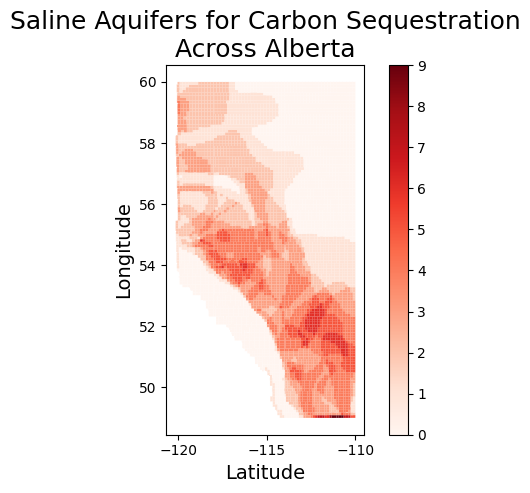

In [56]:
MCM_gdf.plot(column="CCUS_Units", cmap="Reds", legend=True)

plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.grid(False)
plt.title("Saline Aquifers for Carbon Sequestration\nAcross Alberta", fontsize=18)
scalebar = AnchoredSizeBar(ax.transData,
                           1.5, '110 km', 'lower left', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=0.1,
                           fontproperties=fontprops)
ax.add_artist(scalebar)

plt.savefig(dpi=300, fname="Carbon storage across alberta.png")
plt.show()

In [57]:
MCM_gdf.sort_values(by="CCUS_Units", ascending=False)

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units
516,409001,001094,4,9,1,TWP-001 RGE-09 MER-4,409001,"POLYGON ((-111.07453 49.08641, -111.07452 49.0...",0.8,0.0,9
5816,406001,001064,4,6,1,TWP-001 RGE-06 MER-4,406001,"POLYGON ((-110.80704 48.99844, -110.80732 48.9...",0.0,0.0,9
1233,407001,001074,4,7,1,TWP-001 RGE-07 MER-4,407001,"POLYGON ((-110.94058 48.99804, -110.94085 48.9...",0.3,0.0,9
581,410001,001104,4,10,1,TWP-001 RGE-10 MER-4,410001,"POLYGON ((-111.28061 49.08644, -111.27511 49.0...",0.0,0.0,9
6314,408001,001084,4,8,1,TWP-001 RGE-08 MER-4,408001,"POLYGON ((-111.07416 48.99769, -111.07444 48.9...",0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...
5365,404094,094044,4,4,94,TWP-094 RGE-04 MER-4,404094,"POLYGON ((-110.48882 57.11914, -110.48882 57.1...",0.0,0.0,0
5366,404097,097044,4,4,97,TWP-097 RGE-04 MER-4,404097,"POLYGON ((-110.49274 57.38087, -110.49274 57.3...",0.0,0.0,0
5367,404099,099044,4,4,99,TWP-099 RGE-04 MER-4,404099,"POLYGON ((-110.49837 57.55541, -110.49837 57.5...",0.0,0.0,0
5368,404100,100044,4,4,100,TWP-100 RGE-04 MER-4,404100,"POLYGON ((-110.49838 57.64272, -110.49838 57.6...",0.0,0.0,0


In [58]:
MCM_gdf.sort_values(by="Temp_rec_C", ascending=False)


,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units
6205,517045,045175,5,17,45,TWP-045 RGE-17 MER-5,517045,"POLYGON ((-116.35280 52.93061, -116.34683 52.9...",0.0,151.700000,0
1135,523051,051235,5,23,51,TWP-051 RGE-23 MER-5,523051,"POLYGON ((-117.24449 53.45382, -117.24449 53.4...",0.0,149.000000,1
1136,523052,052235,5,23,52,TWP-052 RGE-23 MER-5,523052,"POLYGON ((-117.24449 53.45382, -117.25057 53.4...",0.0,147.000000,1
3453,526052,052265,5,26,52,TWP-052 RGE-26 MER-5,526052,"POLYGON ((-117.68669 53.45387, -117.68669 53.4...",0.0,145.000000,0
1954,526053,053265,5,26,53,TWP-053 RGE-26 MER-5,526053,"POLYGON ((-117.68663 53.54115, -117.68663 53.5...",0.0,143.181818,1
...,...,...,...,...,...,...,...,...,...,...,...
2525,409033,033094,4,9,33,TWP-033 RGE-09 MER-4,409033,"POLYGON ((-111.23942 51.88178, -111.23357 51.8...",0.0,0.000000,5
2524,409023,023094,4,9,23,TWP-023 RGE-09 MER-4,409023,"POLYGON ((-111.18517 51.00852, -111.17943 51.0...",0.0,0.000000,4
2523,409018,018094,4,9,18,TWP-018 RGE-09 MER-4,409018,"POLYGON ((-111.10430 50.57200, -111.10430 50.5...",0.0,0.000000,5
2522,409008,008094,4,9,8,TWP-008 RGE-09 MER-4,409008,"POLYGON ((-111.08845 49.61134, -111.08845 49.6...",0.0,0.000000,4


In [59]:
# before scaling, pull a copy for later use
MCM_populated_gdf = MCM_gdf.copy()

Apply the minmax scaler to the rows to normalize the scores

In [60]:
scaler = MinMaxScaler()

In [61]:
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(MCM_gdf[["Li_mg_L", "CCUS_Units", "Temp_rec_C"]]))

In [62]:
df_norm.rename(columns={0: "Li_norm", 1: "CCUS_norm", 2: "Temp_norm"}, inplace=True)

In [63]:
df_norm 

,Li_norm,CCUS_norm,Temp_norm
0,0.000000,0.111111,0.0
1,0.023929,0.000000,0.0
2,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0
4,0.000000,0.000000,0.0
...,...,...,...
7249,0.000000,0.111111,0.0
7250,0.000000,0.111111,0.0
7251,0.000000,0.111111,0.0
7252,0.000000,0.000000,0.0


In [64]:
MCM_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8...",0.00,0.0,1
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9...",3.35,0.0,0
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1...",0.00,0.0,0
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4...",0.00,0.0,0
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4...",0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6...",0.00,0.0,1
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0...",0.00,0.0,1
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3...",0.00,0.0,1
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6...",0.00,0.0,0


In [65]:
MCM_gdf.shape

(7254, 11)

In [66]:
df_norm.shape

(7254, 3)

In [67]:
MCM_gdf = MCM_gdf.merge(df_norm, how="left", left_index=True, right_index=True)

In [68]:
MCM_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8...",0.00,0.0,1,0.000000,0.111111,0.0
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9...",3.35,0.0,0,0.023929,0.000000,0.0
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1...",0.00,0.0,0,0.000000,0.000000,0.0
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4...",0.00,0.0,0,0.000000,0.000000,0.0
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4...",0.00,0.0,0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6...",0.00,0.0,1,0.000000,0.111111,0.0
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0...",0.00,0.0,1,0.000000,0.111111,0.0
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3...",0.00,0.0,1,0.000000,0.111111,0.0
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6...",0.00,0.0,0,0.000000,0.000000,0.0


In [69]:
MCM_gdf["CCUS_norm"] = MCM_gdf["CCUS_norm"].astype(bool).astype(int)

In [70]:
MCM_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8...",0.00,0.0,1,0.000000,1,0.0
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9...",3.35,0.0,0,0.023929,0,0.0
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1...",0.00,0.0,0,0.000000,0,0.0
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4...",0.00,0.0,0,0.000000,0,0.0
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4...",0.00,0.0,0,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6...",0.00,0.0,1,0.000000,1,0.0
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0...",0.00,0.0,1,0.000000,1,0.0
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3...",0.00,0.0,1,0.000000,1,0.0
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6...",0.00,0.0,0,0.000000,0,0.0


Now that we have all of our metrics normalized, we can calculate an initial score! 

In [71]:
MCM_gdf["Score"] = MCM_gdf["Temp_norm"] * MCM_gdf["CCUS_norm"] * MCM_gdf["Li_norm"]

In [72]:
MCM_gdf.sort_values(by="Score", ascending=False)

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm,Score
2689,518062,062185,5,18,62,TWP-062 RGE-18 MER-5,518062,"POLYGON ((-116.55158 54.32702, -116.55158 54.3...",130.0,108.746667,4,0.928571,1,0.716853,0.665650
6213,517060,060175,5,17,60,TWP-060 RGE-17 MER-5,517060,"POLYGON ((-116.43275 54.23948, -116.42658 54.2...",130.0,107.600000,4,0.928571,1,0.709295,0.658631
919,521059,059215,5,21,59,TWP-059 RGE-21 MER-5,521059,"POLYGON ((-117.03264 54.15216, -117.02647 54.1...",120.0,113.840000,4,0.857143,1,0.750428,0.643224
2491,518061,061185,5,18,61,TWP-061 RGE-18 MER-5,518061,"POLYGON ((-116.58276 54.32675, -116.57658 54.3...",115.0,110.800000,4,0.821429,1,0.730389,0.599962
2348,519058,058195,5,19,58,TWP-058 RGE-19 MER-5,519058,"POLYGON ((-116.67702 54.06477, -116.67702 54.0...",108.5,114.139286,5,0.775000,1,0.752401,0.583111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,507035,035075,5,7,35,TWP-035 RGE-07 MER-5,507035,"POLYGON ((-114.87610 52.05710, -114.87022 52.0...",0.0,112.480000,3,0.000000,1,0.741463,0.000000
2418,507031,031075,5,7,31,TWP-031 RGE-07 MER-5,507031,"POLYGON ((-114.98567 51.62011, -114.98596 51.6...",0.0,115.600000,0,0.000000,0,0.762030,0.000000
2417,507029,029075,5,7,29,TWP-029 RGE-07 MER-5,507029,"POLYGON ((-114.84529 51.53289, -114.84529 51.5...",0.0,107.175000,0,0.000000,0,0.706493,0.000000
2416,507025,025075,5,7,25,TWP-025 RGE-07 MER-5,507025,"POLYGON ((-114.83889 51.09612, -114.83889 51.0...",0.0,0.000000,0,0.000000,0,0.000000,0.000000


In [73]:
edison_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(["-116.4337"], ["53.5854"], crs="EPSG:4269"))
calgary_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(["-114.0719"], ["51.0447"], crs="EPSG:4269"))
edmonton_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(["-113.4937"], ["53.5461"], crs="EPSG:4269"))

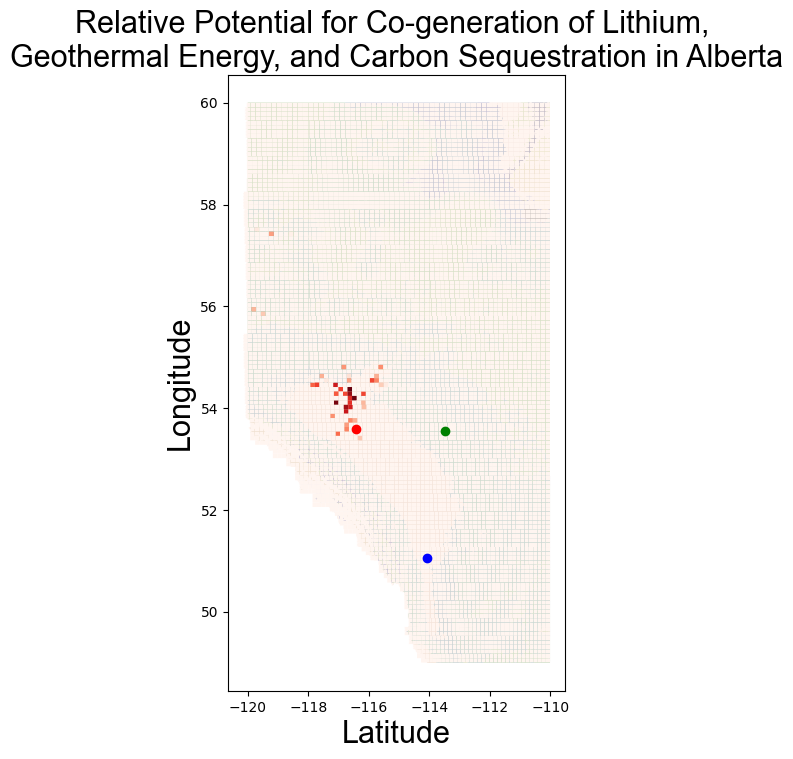

In [74]:
ax = bedrock_df.plot(figsize=(15, 8), cmap="gist_earth", alpha=0.75, column="ColorGroup")
# exploration_lithium_df.plot(ax=ax, color='grey', edgecolor='k', label='Exploration_Lithium', legend=True)
# lithium_df.plot(column= "Li_mg_L", cmap="Reds", ax=ax, legend=True)
# ab_temps_gdf.plot(ax=ax, cmap="Reds", column = "Temp_rec_C", legend=True)
# ATS_gdf.plot(ax=ax)
csfont = {'fontname':"Arial"}

plt.title('title',**csfont)
MCM_gdf.plot(ax=ax, column="Score", cmap="Reds")
edison_gdf.plot(ax=ax, color="Red")
calgary_gdf.plot(ax=ax, color="Blue")
edmonton_gdf.plot(ax=ax, color="Green")
# storage_gdf_filtered.plot(ax=ax, cmap="bone", legend=True)
plt.grid(False)
plt.xlabel('Latitude', fontsize=22, **csfont)
plt.ylabel('Longitude', fontsize=22, **csfont)
plt.title("Relative Potential for Co-generation of Lithium, \nGeothermal Energy, and Carbon Sequestration in Alberta", fontsize=22, **csfont)
# plt.savefig(dpi=300, fname="Potential for cogeneration.png")
plt.show()


In [75]:
MCM_gdf.sort_values(by="Score", ascending=False)

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm,Score
2689,518062,062185,5,18,62,TWP-062 RGE-18 MER-5,518062,"POLYGON ((-116.55158 54.32702, -116.55158 54.3...",130.0,108.746667,4,0.928571,1,0.716853,0.665650
6213,517060,060175,5,17,60,TWP-060 RGE-17 MER-5,517060,"POLYGON ((-116.43275 54.23948, -116.42658 54.2...",130.0,107.600000,4,0.928571,1,0.709295,0.658631
919,521059,059215,5,21,59,TWP-059 RGE-21 MER-5,521059,"POLYGON ((-117.03264 54.15216, -117.02647 54.1...",120.0,113.840000,4,0.857143,1,0.750428,0.643224
2491,518061,061185,5,18,61,TWP-061 RGE-18 MER-5,518061,"POLYGON ((-116.58276 54.32675, -116.57658 54.3...",115.0,110.800000,4,0.821429,1,0.730389,0.599962
2348,519058,058195,5,19,58,TWP-058 RGE-19 MER-5,519058,"POLYGON ((-116.67702 54.06477, -116.67702 54.0...",108.5,114.139286,5,0.775000,1,0.752401,0.583111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,507035,035075,5,7,35,TWP-035 RGE-07 MER-5,507035,"POLYGON ((-114.87610 52.05710, -114.87022 52.0...",0.0,112.480000,3,0.000000,1,0.741463,0.000000
2418,507031,031075,5,7,31,TWP-031 RGE-07 MER-5,507031,"POLYGON ((-114.98567 51.62011, -114.98596 51.6...",0.0,115.600000,0,0.000000,0,0.762030,0.000000
2417,507029,029075,5,7,29,TWP-029 RGE-07 MER-5,507029,"POLYGON ((-114.84529 51.53289, -114.84529 51.5...",0.0,107.175000,0,0.000000,0,0.706493,0.000000
2416,507025,025075,5,7,25,TWP-025 RGE-07 MER-5,507025,"POLYGON ((-114.83889 51.09612, -114.83889 51.0...",0.0,0.000000,0,0.000000,0,0.000000,0.000000


In [76]:
# make export table 

Now, we generate the export table

In [77]:
results_gdf = MCM_gdf.copy()

In [78]:
# first, add seismicity data to results table
ab_earthquakes_gdf

,DT_UTC,DT_MT,LAT,LON,DEPTH,DTYPE,MAG,MTYPE,ETYPE,REF_ID,LOCATION,ALGORITHM,geometry
0,2006-09-24,2006-09-24,49.1089,-111.0550,5,g,1.65,ml,SE,NaN,"""17 km NE of Aden, AB""",GENLOC,POINT (-111.05500 49.10890)
1,2006-10-21,2006-10-21,52.7359,-116.1337,7,f,1.08,ml,KI,NaN,"""28 km NW of Harlech, AB""",HYPODD,POINT (-116.13370 52.73590)
2,2006-11-05,2006-11-05,51.1998,-116.1756,1,g,1.15,ml,SE,NaN,"""9 km NE of Rockwall Peak, AB""",GENLOC,POINT (-116.17560 51.19980)
3,2006-11-08,2006-11-08,52.7289,-116.1536,8,f,2.74,ml,KI,NaN,"""28 km NW of Harlech, AB""",HYPODD,POINT (-116.15360 52.72890)
4,2006-11-21,2006-11-21,51.5194,-115.7114,1,g,1.14,ml,SE,NaN,"""25 km WNW of Panther Mountain, AB""",GENLOC,POINT (-115.71140 51.51940)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,2024-01-30,2024-01-30,54.2865,-117.6011,5,f,1.57,mly,KI,NaN,"""53 km WSW of Fox Creek, AB""",GENLOC,POINT (-117.60110 54.28650)
5944,2024-01-30,2024-01-30,54.1832,-117.7162,6,f,1.58,mly,KI,NaN,"""64 km WSW of Fox Creek, AB""",GENLOC,POINT (-117.71620 54.18320)
5945,2024-01-30,2024-01-30,54.2833,-117.6247,3,f,3.04,ml,KI,424463.0,"""54 km WSW of Fox Creek, AB""",GENLOC,POINT (-117.62470 54.28330)
5946,2024-01-30,2024-01-30,54.2489,-117.6001,4,f,1.61,mly,KI,NaN,"""54 km WSW of Fox Creek, AB""",GENLOC,POINT (-117.60010 54.24890)


In [79]:
results_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm,Score
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8...",0.00,0.0,1,0.000000,1,0.0,0.0
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9...",3.35,0.0,0,0.023929,0,0.0,0.0
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1...",0.00,0.0,0,0.000000,0,0.0,0.0
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4...",0.00,0.0,0,0.000000,0,0.0,0.0
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4...",0.00,0.0,0,0.000000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6...",0.00,0.0,1,0.000000,1,0.0,0.0
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0...",0.00,0.0,1,0.000000,1,0.0,0.0
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3...",0.00,0.0,1,0.000000,1,0.0,0.0
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6...",0.00,0.0,0,0.000000,0,0.0,0.0


In [80]:
joined = gpd.sjoin(results_gdf, ab_earthquakes_gdf, predicate="contains")

count_points = joined.groupby(joined.index).size()
results_gdf["Earthquake_count"] = count_points
results_gdf["Earthquake_count"] = results_gdf["Earthquake_count"].fillna(0)

In [81]:
results_gdf

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm,Score,Earthquake_count
0,410068,068104,4,10,68,TWP-068 RGE-10 MER-4,410068,"POLYGON ((-111.37867 54.84966, -111.37867 54.8...",0.00,0.0,1,0.000000,1,0.0,0.0,0.0
1,410069,069104,4,10,69,TWP-069 RGE-10 MER-4,410069,"POLYGON ((-111.37872 54.93694, -111.37872 54.9...",3.35,0.0,0,0.023929,0,0.0,0.0,0.0
2,410071,071104,4,10,71,TWP-071 RGE-10 MER-4,410071,"POLYGON ((-111.39131 55.11179, -111.39131 55.1...",0.00,0.0,0,0.000000,0,0.0,0.0,0.0
3,410074,074104,4,10,74,TWP-074 RGE-10 MER-4,410074,"POLYGON ((-111.39135 55.46085, -111.39135 55.4...",0.00,0.0,0,0.000000,0,0.0,0.0,0.0
4,410075,075104,4,10,75,TWP-075 RGE-10 MER-4,410075,"POLYGON ((-111.41034 55.46081, -111.41612 55.4...",0.00,0.0,0,0.000000,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,506009,009065,5,6,9,TWP-009 RGE-06 MER-5,506009,"POLYGON ((-114.67888 49.69925, -114.67888 49.6...",0.00,0.0,1,0.000000,1,0.0,0.0,0.0
7250,506013,013065,5,6,13,TWP-013 RGE-06 MER-5,506013,"POLYGON ((-114.68396 50.04849, -114.68396 50.0...",0.00,0.0,1,0.000000,1,0.0,0.0,0.0
7251,506016,016065,5,6,16,TWP-016 RGE-06 MER-5,506016,"POLYGON ((-114.68935 50.31003, -114.68935 50.3...",0.00,0.0,1,0.000000,1,0.0,0.0,0.0
7252,506019,019065,5,6,19,TWP-019 RGE-06 MER-5,506019,"POLYGON ((-114.69384 50.65916, -114.69383 50.6...",0.00,0.0,0,0.000000,0,0.0,0.0,0.0


In [82]:
# Create a new column in the results geodataframe that includes the names of all indigenous communities that claim that particular cell as their traditional territories 

# Create an empty dictionary to store the overlapping geometries for each grid
overlap_dict = {}

# Iterate over each grid polygon
for index, grid_row in results_gdf.iterrows():
    grid_box = grid_row.geometry  # Get the geometry of the current grid box
    overlapping_geometries = []  # List to store overlapping geometry names

    # Iterate over each geometry and check for intersection with the grid box
    for idx, geom_row in indigenous_df_filtered.iterrows():
        if geom_row.geometry.intersects(grid_box):
            overlapping_geometries.append(geom_row['Name'])

    # Store the list of overlapping geometry names in the dictionary
    overlap_dict[index] = overlapping_geometries

# Add the list of overlapping geometry names to the grid GeoDataFrame
results_gdf['Indigenous communities'] = overlap_dict.values()



In [83]:
results_gdf.sort_values(by="Score", ascending=False)

,FILE_NAME,TRM,M,RGE,TWP,DESCRIPTOR,PID,geometry,Li_mg_L,Temp_rec_C,CCUS_Units,Li_norm,CCUS_norm,Temp_norm,Score,Earthquake_count,Indigenous communities
2689,518062,062185,5,18,62,TWP-062 RGE-18 MER-5,518062,"POLYGON ((-116.55158 54.32702, -116.55158 54.3...",130.0,108.746667,4,0.928571,1,0.716853,0.665650,8.0,"[ᓀᐦᐃᔭᐤ ᐊᐢᑭᕀ Nêhiyaw-Askiy (Plains Cree), Kelly..."
6213,517060,060175,5,17,60,TWP-060 RGE-17 MER-5,517060,"POLYGON ((-116.43275 54.23948, -116.42658 54.2...",130.0,107.600000,4,0.928571,1,0.709295,0.658631,1.0,"[ᓀᐦᐃᔭᐤ ᐊᐢᑭᕀ Nêhiyaw-Askiy (Plains Cree), Kelly..."
919,521059,059215,5,21,59,TWP-059 RGE-21 MER-5,521059,"POLYGON ((-117.03264 54.15216, -117.02647 54.1...",120.0,113.840000,4,0.857143,1,0.750428,0.643224,2.0,"[ᓀᐦᐃᔭᐤ ᐊᐢᑭᕀ Nêhiyaw-Askiy (Plains Cree), Kelly..."
2491,518061,061185,5,18,61,TWP-061 RGE-18 MER-5,518061,"POLYGON ((-116.58276 54.32675, -116.57658 54.3...",115.0,110.800000,4,0.821429,1,0.730389,0.599962,7.0,"[ᓀᐦᐃᔭᐤ ᐊᐢᑭᕀ Nêhiyaw-Askiy (Plains Cree), Kelly..."
2348,519058,058195,5,19,58,TWP-058 RGE-19 MER-5,519058,"POLYGON ((-116.67702 54.06477, -116.67702 54.0...",108.5,114.139286,5,0.775000,1,0.752401,0.583111,1.0,"[ᓀᐦᐃᔭᐤ ᐊᐢᑭᕀ Nêhiyaw-Askiy (Plains Cree), Kelly..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,507035,035075,5,7,35,TWP-035 RGE-07 MER-5,507035,"POLYGON ((-114.87610 52.05710, -114.87022 52.0...",0.0,112.480000,3,0.000000,1,0.741463,0.000000,1.0,"[Ktunaxa ɁamakɁis, ᓀᐦᐃᔭᐤ ᐊᐢᑭᕀ Nêhiyaw-Askiy (P..."
2418,507031,031075,5,7,31,TWP-031 RGE-07 MER-5,507031,"POLYGON ((-114.98567 51.62011, -114.98596 51.6...",0.0,115.600000,0,0.000000,0,0.762030,0.000000,0.0,"[Ktunaxa ɁamakɁis, Ĩyãħé Nakón mąkóce (Stone..."
2417,507029,029075,5,7,29,TWP-029 RGE-07 MER-5,507029,"POLYGON ((-114.84529 51.53289, -114.84529 51.5...",0.0,107.175000,0,0.000000,0,0.706493,0.000000,0.0,"[Ktunaxa ɁamakɁis, Ĩyãħé Nakón mąkóce (Stone..."
2416,507025,025075,5,7,25,TWP-025 RGE-07 MER-5,507025,"POLYGON ((-114.83889 51.09612, -114.83889 51.0...",0.0,0.000000,0,0.000000,0,0.000000,0.000000,2.0,"[Ktunaxa ɁamakɁis, Ĩyãħé Nakón mąkóce (Stone..."


In [88]:
results_df = pd.DataFrame(results_gdf).sort_values(by="Score", ascending=False)

In [89]:
results_df.to_excel("output.xlsx")